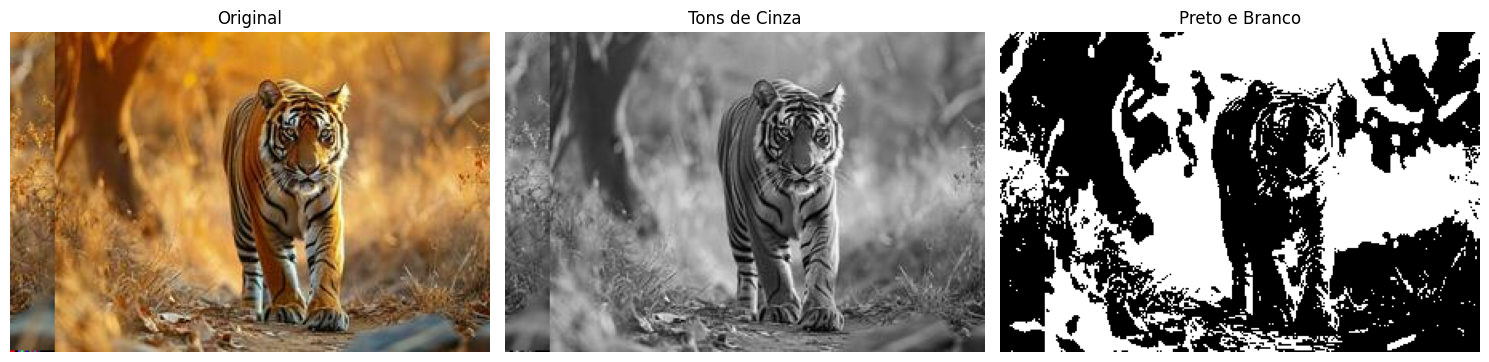

In [4]:
import struct
import io
from PIL import Image
import matplotlib.pyplot as plt

# === Funções ===

def carregar_bmp(caminho):
    with open(caminho, 'rb') as f:
        cabecalho = f.read(54)
        dados = f.read()

    largura = struct.unpack('<I', cabecalho[18:22])[0]
    altura = struct.unpack('<I', cabecalho[22:26])[0]
    profundidade = struct.unpack('<H', cabecalho[28:30])[0]

    if profundidade != 24:
        raise ValueError('Apenas imagens BMP de 24 bits são suportadas.')

    bytes_por_linha = ((largura * 3 + 3) // 4) * 4
    pixels = []

    for y in range(altura):
        linha = []
        offset = y * bytes_por_linha
        for x in range(largura):
            base = offset + x * 3
            azul = dados[base]
            verde = dados[base + 1]
            vermelho = dados[base + 2]
            linha.append((vermelho, verde, azul))
        pixels.insert(0, linha)
    return cabecalho, pixels, largura, altura

def pixels_para_imagem(pixels, largura, altura):
    img = Image.new('RGB', (largura, altura))
    for y in range(altura):
        for x in range(largura):
            img.putpixel((x, y), pixels[y][x])
    return img

def converter_para_cinza(pixels):
    pixels_cinza = []
    for linha in pixels:
        nova_linha = []
        for r, g, b in linha:
            cinza = int(0.299 * r + 0.587 * g + 0.114 * b)
            nova_linha.append((cinza, cinza, cinza))
        pixels_cinza.append(nova_linha)
    return pixels_cinza

def binarizar(pixels_cinza, limiar=127):
    pixels_bin = []
    for linha in pixels_cinza:
        nova_linha = []
        for r, g, b in linha:
            valor = 255 if r > limiar else 0
            nova_linha.append((valor, valor, valor))
        pixels_bin.append(nova_linha)
    return pixels_bin

# === Execução ===

entrada = '/content/imagem.bmp'  # Coloque o arquivo na aba lateral "Arquivos" do Colab

# Carrega imagem BMP original
cabecalho, pixels_originais, largura, altura = carregar_bmp(entrada)

# Converte para cinza e binário
pixels_cinza = converter_para_cinza(pixels_originais)
pixels_bin = binarizar(pixels_cinza)

# Converte pixels para imagens PIL
img_original = pixels_para_imagem(pixels_originais, largura, altura)
img_cinza = pixels_para_imagem(pixels_cinza, largura, altura)
img_bin = pixels_para_imagem(pixels_bin, largura, altura)

# Exibe as imagens no Colab lado a lado
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img_original)
axs[0].set_title("Original")
axs[0].axis('off')

axs[1].imshow(img_cinza, cmap='gray')
axs[1].set_title("Tons de Cinza")
axs[1].axis('off')

axs[2].imshow(img_bin, cmap='gray')
axs[2].set_title("Preto e Branco")
axs[2].axis('off')

plt.tight_layout()
plt.show()